# 3 Capstone II Exploratory Data Analysis

## The U.S. Petroleum Refinery and Market Profiles

We will be looking at 121+ U.S. petroleum refineries and their operating capacities in relation to the top U.S. 65 major cities by population. The relation will be measured in terms of distance from each refinery to the major cities and population size of each city, to derrive at market size in volume of petroleum products and USD values at destination market prices.

The first thing is, we will narrow down the analysis to the contiguous states only, that is, exclude Alaska and Hawaii, as they are outlier cases

# 3.1 Imports

In [1]:
import os
from library.sb_utils import save_file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# 3.2 Load The Data

## 3.2.1 Profiles Data

In [2]:
# Load the data
data = pd.read_excel('../data/df_Step_2.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Series              969 non-null    object 
 1   RFY-PADD            969 non-null    object 
 2   RFY-PAD-Sub         969 non-null    object 
 3   RFY-PAD-District    969 non-null    object 
 4   RFY_ID              969 non-null    object 
 5   RFY_State           969 non-null    object 
 6   RFY_BPCD            969 non-null    int64  
 7   CATCRKRECYL         969 non-null    float64
 8   CATHYDRCRCK         969 non-null    float64
 9   CATHYDTRMT          969 non-null    float64
 10  CATLREFORM          969 non-null    float64
 11  CATLYTCRCK          969 non-null    float64
 12  COKING              969 non-null    float64
 13  FUELSOLDEASP        969 non-null    float64
 14  THERMCRCK           969 non-null    float64
 15  VACMDIST            969 non-null    float64
 16  Crude_AP

## 3.2.2 Split out the dataset for further exploration

Split the data to refinery specific and destination market specific:
- Refineries: Capacity, Configuration, Yields, Distance to Markets, Refinery Pressure to Markets, and Crack Spreads
- Destination Markets: Distance to Markets, Market Resistance, Market Value of products (combined Sale Prices per each volume of products yielded from each volume of crude processed

In [4]:
# Split out refinery specific data as dataframe rfy_df:
rfy_df = data.iloc[:,np.r_[1:7, 77:88, 7:41]]
rfy_df.head().T

,0,1,2,3,4
RFY-PADD,PAD-3,PAD-3,PAD-3,PAD-3,PAD-3
RFY-PAD-Sub,PAD-3,PAD-3,PAD-3,PAD-3,PAD-3
RFY-PAD-District,PAD-3-3,PAD-3-3,PAD-3-3,PAD-3-4,PAD-3-4
RFY_ID,RFY-001,RFY-002,RFY-003,RFY-009,RFY-010
RFY_State,Alabama,Alabama,Alabama,Arkansas,Arkansas
RFY_BPCD,87500,48000,4100,83000,7500
PAD-1-1,0,0,0,0,0
PAD-1-2,0,0,0,0,0
PAD-2-1,0,0,0,0,0
PAD-2-2,0,0,0,0,0


In [5]:
# Split out market data as a datafeame markets_df:
markets_df = data.iloc[:, np.r_[3:6, 21:26, 48:77, 26:33]]
markets_df.head().T

,0,1,2,3,4
RFY-PAD-District,PAD-3-3,PAD-3-3,PAD-3-3,PAD-3-4,PAD-3-4
RFY_ID,RFY-001,RFY-002,RFY-003,RFY-009,RFY-010
RFY_State,Alabama,Alabama,Alabama,Arkansas,Arkansas
WTI_Price,97.9058,97.9058,97.9058,97.9058,97.9058
WTI_Diff,3.64583,3.64583,3.64583,3.64583,3.64583
WTI_Acq_Cost,101.552,101.552,101.552,101.552,101.552
Brent_Price,108.637,108.637,108.637,108.637,108.637
Brent_Diff,-3.89583,-3.89583,-3.89583,-3.89583,-3.89583
RFY_Press_PAD-1A,61.688,38.2819,2.97009,52.7032,4.7645
RFY_Press_PAD-1B,81.488,52.7151,3.95626,67.8906,6.14586


# 3.3 Explore The Data

## 3.3.1 Categorical Features

In [6]:
data.select_dtypes('object')

,Series,RFY-PADD,RFY-PAD-Sub,RFY-PAD-District,RFY_ID,RFY_State
0,P_1000,PAD-3,PAD-3,PAD-3-3,RFY-001,Alabama
1,P_1000,PAD-3,PAD-3,PAD-3-3,RFY-002,Alabama
2,P_1000,PAD-3,PAD-3,PAD-3-3,RFY-003,Alabama
3,P_1000,PAD-3,PAD-3,PAD-3-4,RFY-009,Arkansas
4,P_1000,PAD-3,PAD-3,PAD-3-4,RFY-010,Arkansas
...,...,...,...,...,...,...
964,P_8000,PAD-4,PAD-4,PAD-4,RFY-129,Wyoming
965,P_8000,PAD-4,PAD-4,PAD-4,RFY-130,Wyoming
966,P_8000,PAD-4,PAD-4,PAD-4,RFY-131,Wyoming
967,P_8000,PAD-4,PAD-4,PAD-4,RFY-132,Wyoming


#### Here, the categorical variables represent the following:
- Series: 8 groups of observations per each 121-122 refineries
- RFY-PADD: 5 high-level grouping of refinery locations per the U.S. petroleum allocation districts, (PADD = "Petroleum Administration for Defense Districts")
- RFY-PAD-Sub: 7 second-level grouping of PADD
- RFY-PAD-District: 7 lowest level grouping of PADD, there's some overlapping with RFY-PAD-Sub, as some states are divided among PAD-District groups
- RFY_ID: specific refinery ID; there are 122 unique refineries being observed
- RFY_State: states, where specific refineries are located

## 3.3.2 Distributions

In [7]:
rfy_df['RFY_ID'].describe()

count         969
unique        122
top       RFY-119
freq            8
Name: RFY_ID, dtype: object

We have identified 122 specific refineries, over 969 observations - 121 are actual observations over 8 series and 1 is a fictional Falcon Refinery with RFY-ID 121

### 3.3.2.1 Distribution of refineries

In [8]:
# Number of refineries per state
rfy_df['RFY_State'].value_counts()/8

Texas            27.000
Louisiana        16.000
California       15.000
Washington        5.000
Oklahoma          5.000
Wyoming           5.000
Montana           4.000
Ohio              4.000
Pennsylvania      4.000
Illinois          4.000
Utah              4.000
Kansas            3.000
Alabama           3.000
Mississippi       3.000
North Dakota      2.125
Arkansas          2.000
New Jersey        2.000
Indiana           2.000
Colorado          2.000
New Mexico        2.000
West Virginia     1.000
Minnesota         1.000
Michigan          1.000
Delaware          1.000
Kentucky          1.000
Tennessee         1.000
Nevada            1.000
Name: RFY_State, dtype: float64

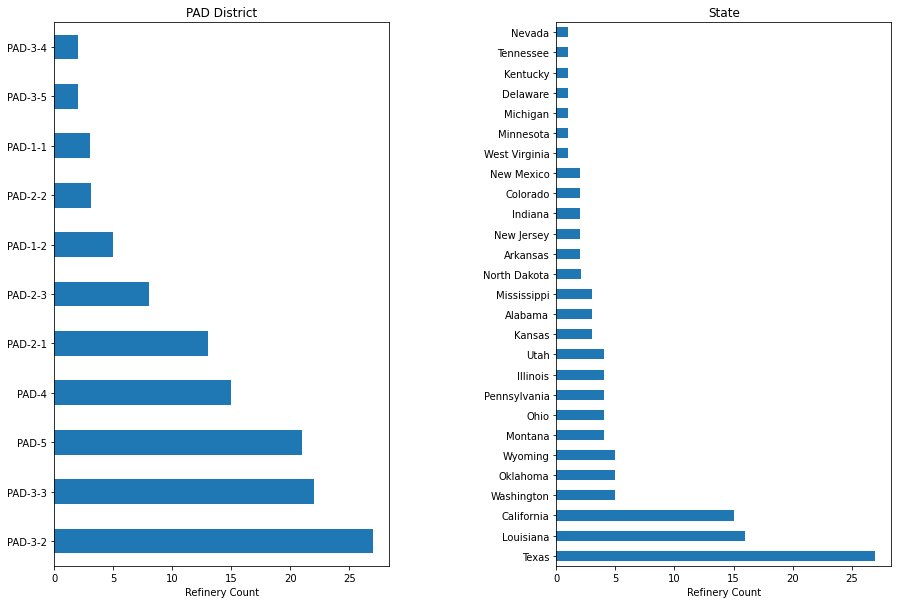

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

(rfy_df['RFY-PAD-District'].value_counts()/8).plot(kind='barh', ax=ax[0])
ax[0].set_title('PAD District')
ax[0].set_xlabel('Refinery Count')

(rfy_df['RFY_State'].value_counts()/8).plot(kind='barh', ax=ax[1])
ax[1].set_title('State')
ax[1].set_xlabel('Refinery Count')

plt.subplots_adjust(wspace=0.5)

### 3.3.2.2 Distribution of refinery capacities

In [10]:
# Refinery capacities per state
(rfy_df.groupby('RFY_State')['RFY_BPCD'].sum()/8).sort_values(ascending=False)

RFY_State
Texas            5604029.0
Louisiana        3366666.0
California       1909171.0
Illinois         1026865.0
Washington        651700.0
Ohio              601800.0
Pennsylvania      601000.0
Oklahoma          522800.0
Indiana           463800.0
New Jersey        418500.0
Kansas            403800.0
Mississippi       393940.0
Minnesota         335000.0
Kentucky          291000.0
Montana           223000.0
Delaware          182200.0
Tennessee         180000.0
Wyoming           168500.0
Utah              148994.0
Michigan          140000.0
Alabama           139600.0
New Mexico        137000.0
Colorado          103000.0
North Dakota       96250.0
Arkansas           90500.0
West Virginia      22300.0
Nevada              2000.0
Name: RFY_BPCD, dtype: float64

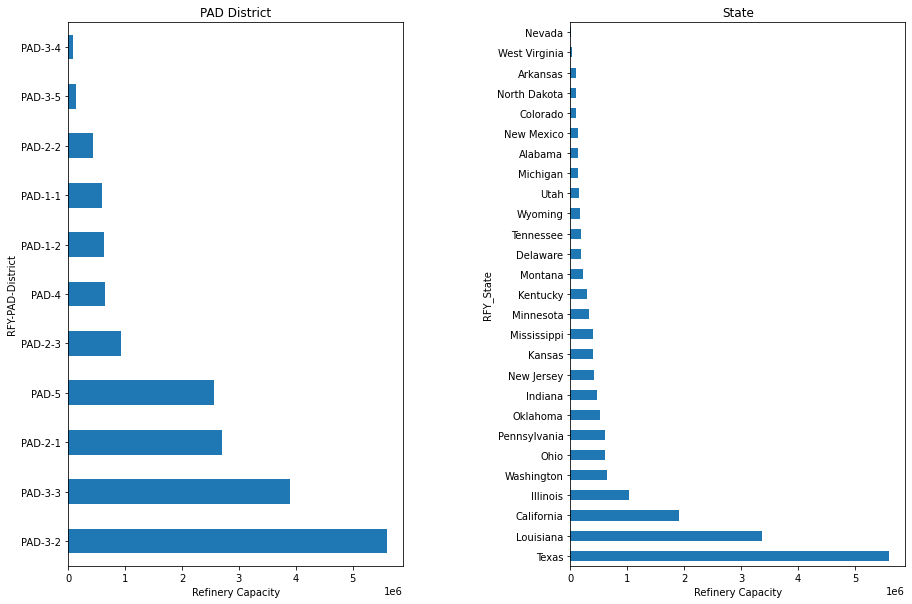

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

(rfy_df.groupby('RFY-PAD-District')['RFY_BPCD'].sum()/8).sort_values(ascending=False).plot(kind='barh', ax=ax[0])
ax[0].set_title('PAD District')
ax[0].set_xlabel('Refinery Capacity')

(rfy_df.groupby('RFY_State')['RFY_BPCD'].sum()/8).sort_values(ascending=False).plot(kind='barh', ax=ax[1])
ax[1].set_title('State')
ax[1].set_xlabel('Refinery Capacity')

plt.subplots_adjust(wspace=0.5)

### 3.3.2.3 Distribution of average refinery crackspreads - grouped by state

In [12]:
specific_crack_array = ['SPECF_CRCK_PAD-1A', 'SPECF_CRCK_PAD-1B', 'SPECF_CRCK_PAD-1C',
                        'SPECF_CRCK_PAD-2', 'SPECF_CRCK_PAD-3', 'SPECF_CRCK_PAD-4',
                        'SPECF_CRCK_PAD-5', 'SPECF_RFY_CRCK']
state_avg_crackspread = rfy_df.groupby('RFY-PAD-District')[specific_crack_array].mean()

In [13]:
state_avg_crackspread.describe()

,SPECF_CRCK_PAD-1A,SPECF_CRCK_PAD-1B,SPECF_CRCK_PAD-1C,SPECF_CRCK_PAD-2,SPECF_CRCK_PAD-3,SPECF_CRCK_PAD-4,SPECF_CRCK_PAD-5,SPECF_RFY_CRCK
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2.732381,3.436787,3.808014,3.812386,3.010835,2.445998,4.845941,24.092342
std,1.105126,1.265974,1.161865,1.106229,1.088083,0.729569,1.267608,7.275495
min,0.773264,1.091019,1.588389,1.637512,1.206068,1.469758,2.550301,10.316311
25%,2.170902,2.807615,3.138795,3.191355,2.462088,1.852042,3.939377,19.460160
50%,2.748831,3.491539,3.721250,3.769952,2.642578,2.559496,4.827257,23.655455
75%,3.454648,4.373187,4.722926,4.632317,4.066343,2.792443,6.027465,30.557333
max,4.468688,5.176470,5.464487,5.435333,4.704419,3.859316,6.415267,33.398741


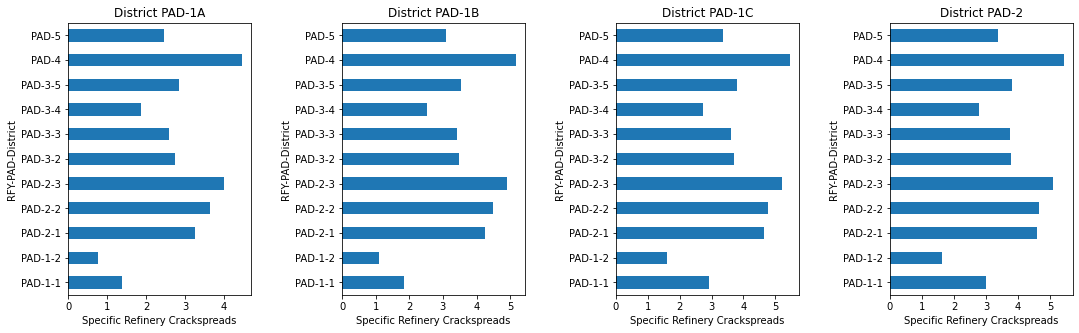

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

rfy_df.groupby('RFY-PAD-District')['SPECF_CRCK_PAD-1A'].mean().plot(kind='barh', ax=ax[0], sharex='col')
ax[0].set_title('District PAD-1A')
ax[0].set_xlabel('Specific Refinery Crackspreads')

rfy_df.groupby('RFY-PAD-District')['SPECF_CRCK_PAD-1B'].mean().plot(kind='barh', ax=ax[1], sharex='col')
ax[1].set_title('District PAD-1B')
ax[1].set_xlabel('Specific Refinery Crackspreads')

rfy_df.groupby('RFY-PAD-District')['SPECF_CRCK_PAD-1C'].mean().plot(kind='barh', ax=ax[2], sharex='col')
ax[2].set_title('District PAD-1C')
ax[2].set_xlabel('Specific Refinery Crackspreads')

rfy_df.groupby('RFY-PAD-District')['SPECF_CRCK_PAD-2'].mean().plot(kind='barh', ax=ax[3], sharex='col')
ax[3].set_title('District PAD-2')
ax[3].set_xlabel('Specific Refinery Crackspreads')

plt.subplots_adjust(wspace=0.5)

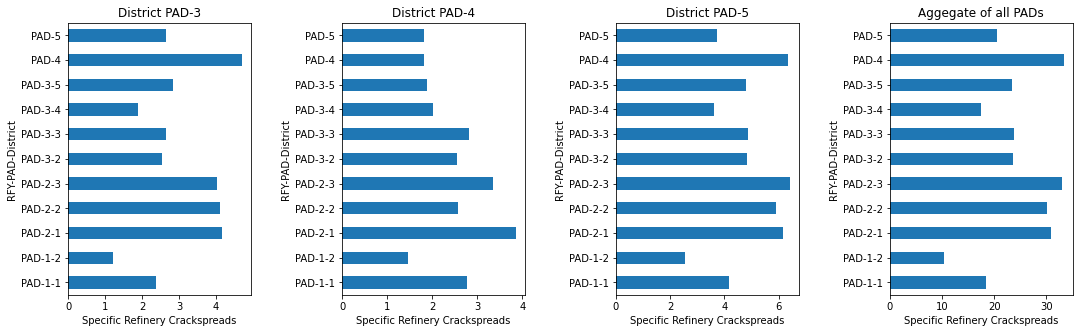

In [15]:
fig2, ax2 = plt.subplots(nrows=1, ncols=4, figsize=(18,5))

rfy_df.groupby('RFY-PAD-District')['SPECF_CRCK_PAD-3'].mean().plot(kind='barh', ax=ax2[0], sharex='col')
ax2[0].set_title('District PAD-3')
ax2[0].set_xlabel('Specific Refinery Crackspreads')

rfy_df.groupby('RFY-PAD-District')['SPECF_CRCK_PAD-4'].mean().plot(kind='barh', ax=ax2[1], sharex='col')
ax2[1].set_title('District PAD-4')
ax2[1].set_xlabel('Specific Refinery Crackspreads')

rfy_df.groupby('RFY-PAD-District')['SPECF_CRCK_PAD-5'].mean().plot(kind='barh', ax=ax2[2], sharex='col')
ax2[2].set_title('District PAD-5')
ax2[2].set_xlabel('Specific Refinery Crackspreads')

rfy_df.groupby('RFY-PAD-District')['SPECF_RFY_CRCK'].mean().plot(kind='barh', ax=ax2[3], sharex='col')
ax2[3].set_title('Aggegate of all PADs')
ax2[3].set_xlabel('Specific Refinery Crackspreads')

plt.subplots_adjust(wspace=0.5)

### 3.3.2.4 Distribution of average refinery crackspreads - grouped by PAD district

In [16]:
PAD_District_avg_crackspread = rfy_df.groupby('RFY-PAD-District')['SPECF_RFY_CRCK'].mean()

In [17]:
PAD_District_avg_crackspread.describe()

count    11.000000
mean     24.092342
std       7.275495
min      10.316311
25%      19.460160
50%      23.655455
75%      30.557333
max      33.398741
Name: SPECF_RFY_CRCK, dtype: float64

Looking at the historgram of crack spread distributions grouped by refinery state and PAD district, we can conclude that a PAD District grouping is a fairly good representation of all specific refineries - in other words, we can rely on aggregating the data at a PAD District level, rather than try to track at a state level

## 3.3.3 Numeric Features - Markets

In [18]:
markets_df.describe().T

,count,mean,std,min,25%,50%,75%,max
WTI_Price,969.0,61.766287,20.951974,38.519091,43.144167,50.884167,64.938333,97.905833
WTI_Diff,969.0,-2.623679,6.058999,-18.304167,-6.049091,-1.563333,2.219167,8.945833
WTI_Acq_Cost,969.0,59.142608,21.744230,31.169091,42.340833,50.781667,69.723333,106.851667
Brent_Price,969.0,66.753416,23.426224,41.010909,43.548333,54.247500,71.060833,108.637500
Brent_Diff,969.0,-3.430013,3.410503,-19.925833,-4.062500,-2.599167,-1.465000,3.049091
RFY_Press_PAD-1A,969.0,117.350649,162.491464,0.722320,25.816366,52.438117,141.575832,1010.775862
RFY_Press_PAD-1B,969.0,196.635437,406.244639,0.801353,31.686203,61.988808,186.921180,3126.296143
RFY_Press_PAD-1C,969.0,146.769732,159.150749,0.814133,31.699772,75.318998,236.584549,700.492850
RFY_Press_PAD-2,969.0,178.272967,193.806876,1.163567,45.130864,101.231795,252.633643,1064.174240
RFY_Press_PAD-3,969.0,236.508422,295.796480,1.338016,46.968045,137.445223,281.052558,1402.941091


In [19]:
markets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RFY-PAD-District    969 non-null    object 
 1   RFY_ID              969 non-null    object 
 2   RFY_State           969 non-null    object 
 3   WTI_Price           969 non-null    float64
 4   WTI_Diff            969 non-null    float64
 5   WTI_Acq_Cost        969 non-null    float64
 6   Brent_Price         969 non-null    float64
 7   Brent_Diff          969 non-null    float64
 8   RFY_Press_PAD-1A    969 non-null    float64
 9   RFY_Press_PAD-1B    969 non-null    float64
 10  RFY_Press_PAD-1C    969 non-null    float64
 11  RFY_Press_PAD-2     969 non-null    float64
 12  RFY_Press_PAD-3     969 non-null    float64
 13  RFY_Press_PAD-4     969 non-null    float64
 14  RFY_Press_PAD-5     969 non-null    float64
 15  BPD_DENS_PAD-1A     969 non-null    float64
 16  BPD_DENS

### 3.3.3.1 Markets summary data

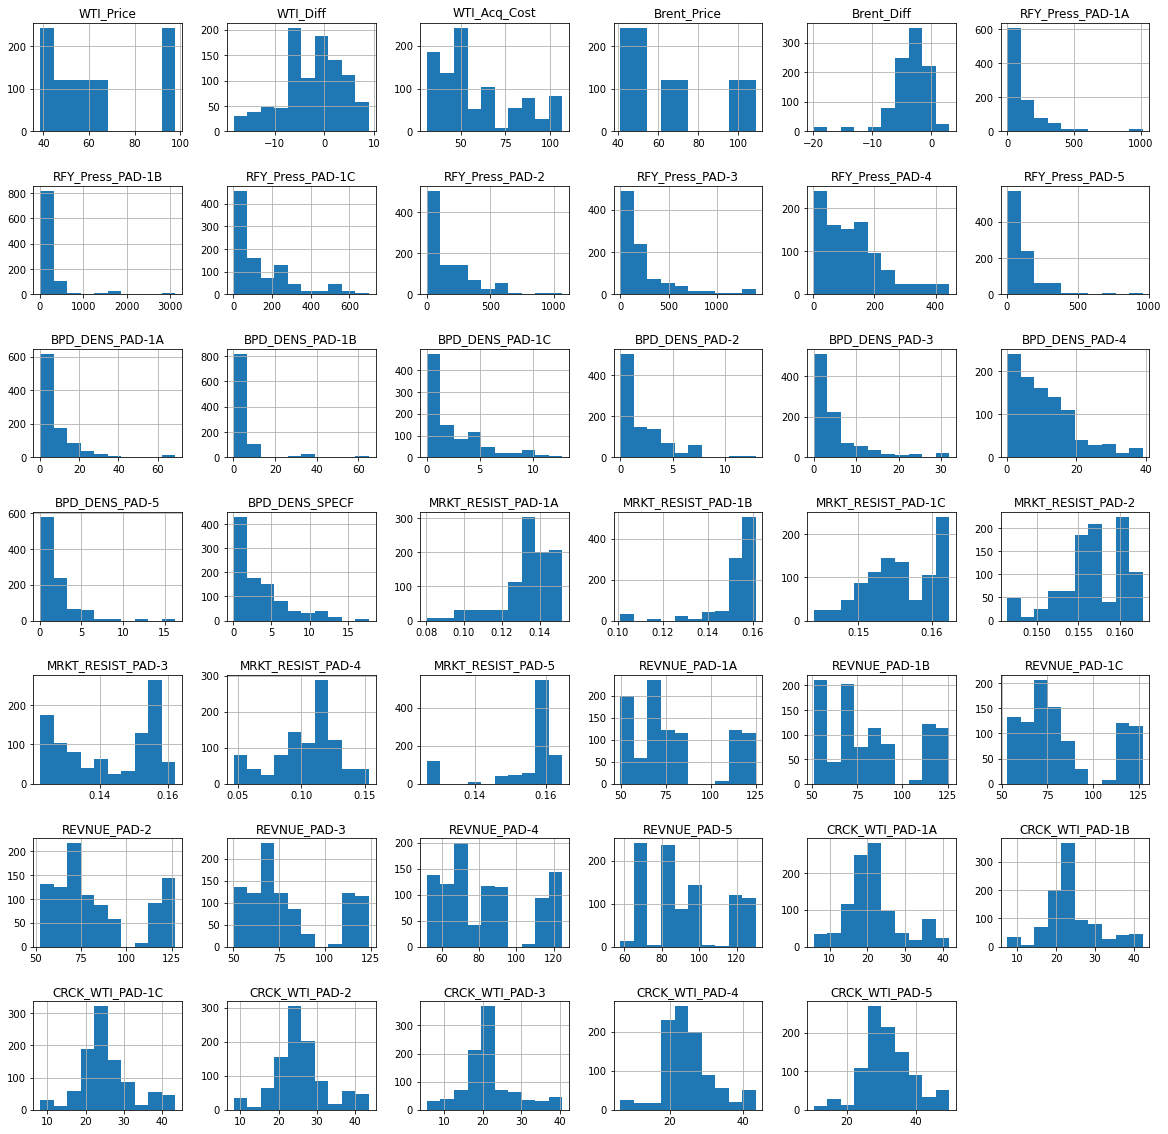

In [20]:
markets_df.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

#### Reduce redundant variables
Crack spread values are derivatives of the WTI indicies and along with the 'WTI Diff' and 'WTI Acq Cost' variables do not add much to the correlations among the market variables. At the same time, the crack spread values are calculated using the WTI and Revenue features.

So, we can remove both the WTI and Crack spread features and just leave the Revenue values for the market data set.

It is also apparent from the histrogram subplots that the variables for "Product Supply per capita at Markets" ('BPD_DENS_PAD_') and "Refinery Pressure to Markets" ('RFY_Press_PAD_') look identical, even though their absolute values are different.

We will remove the 'RFY_Press_' features from the markets data set.

In [21]:
markets_summary = markets_df.iloc[:, np.r_[15:37]]

In [22]:
markets_summary.shape

(969, 22)

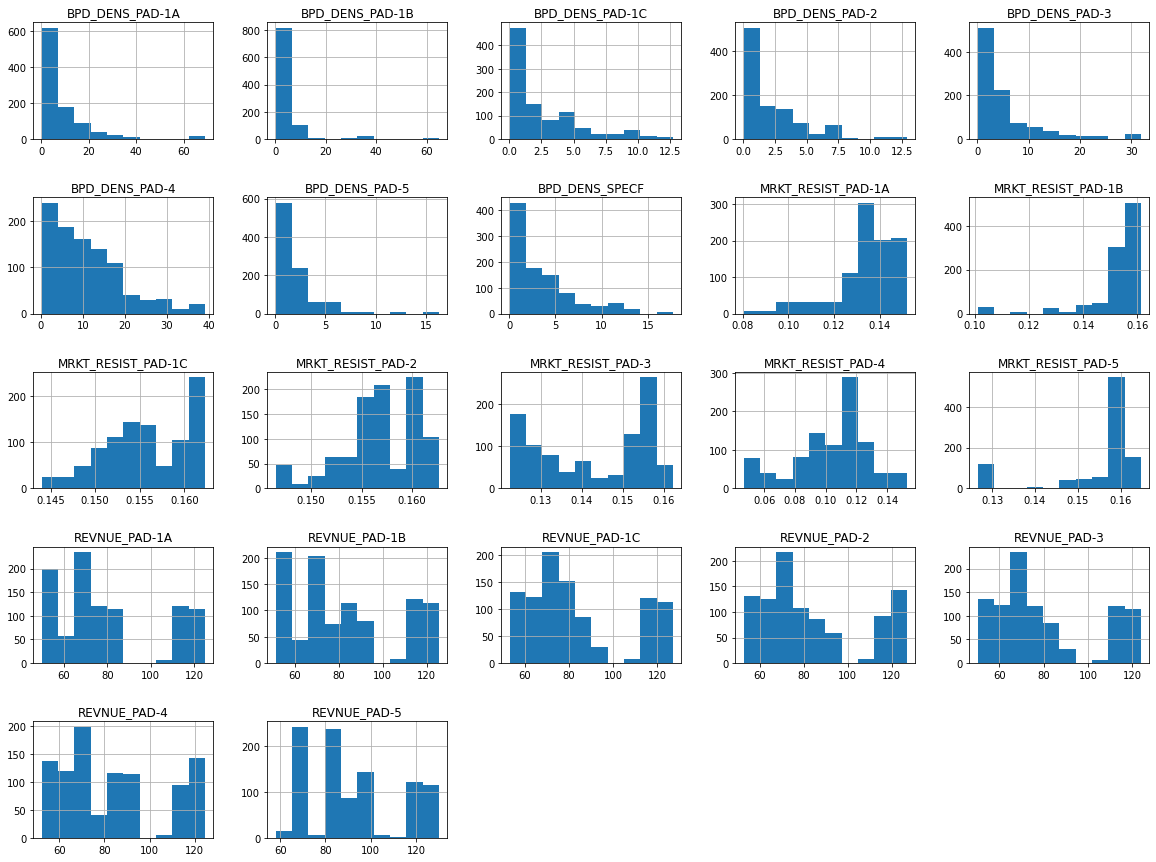

In [23]:
markets_summary.hist(figsize=(20,15))
plt.subplots_adjust(hspace=0.5);

### 3.3.3.2 USD values per barrel of Crude Oil processed and Products Refined:

In [24]:
markets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RFY-PAD-District    969 non-null    object 
 1   RFY_ID              969 non-null    object 
 2   RFY_State           969 non-null    object 
 3   WTI_Price           969 non-null    float64
 4   WTI_Diff            969 non-null    float64
 5   WTI_Acq_Cost        969 non-null    float64
 6   Brent_Price         969 non-null    float64
 7   Brent_Diff          969 non-null    float64
 8   RFY_Press_PAD-1A    969 non-null    float64
 9   RFY_Press_PAD-1B    969 non-null    float64
 10  RFY_Press_PAD-1C    969 non-null    float64
 11  RFY_Press_PAD-2     969 non-null    float64
 12  RFY_Press_PAD-3     969 non-null    float64
 13  RFY_Press_PAD-4     969 non-null    float64
 14  RFY_Press_PAD-5     969 non-null    float64
 15  BPD_DENS_PAD-1A     969 non-null    float64
 16  BPD_DENS

The most important variable for the market specific data is the refined product pricing.

In [25]:
markets_df[['BPD_DENS_PAD-1A', 'BPD_DENS_PAD-1B', 'BPD_DENS_PAD-1C',
            'BPD_DENS_PAD-2', 'BPD_DENS_PAD-3', 'BPD_DENS_PAD-4', 'BPD_DENS_PAD-5', 'WTI_Price',
            'REVNUE_PAD-1A', 'REVNUE_PAD-1B', 'REVNUE_PAD-1C',
            'REVNUE_PAD-2', 'REVNUE_PAD-3', 'REVNUE_PAD-4', 'REVNUE_PAD-5']].describe()

,BPD_DENS_PAD-1A,BPD_DENS_PAD-1B,BPD_DENS_PAD-1C,BPD_DENS_PAD-2,BPD_DENS_PAD-3,BPD_DENS_PAD-4,BPD_DENS_PAD-5,WTI_Price,REVNUE_PAD-1A,REVNUE_PAD-1B,REVNUE_PAD-1C,REVNUE_PAD-2,REVNUE_PAD-3,REVNUE_PAD-4,REVNUE_PAD-5
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,7.945814,4.078963,2.567951,2.146697,5.197325,10.937249,1.962240,61.766287,80.709677,83.034012,84.570999,84.598494,80.743473,84.056966,91.190750
std,11.002509,8.427058,2.786382,2.333814,6.502273,8.637002,2.288585,20.951974,24.006267,23.151385,22.807471,23.209450,23.051015,22.559678,21.215312
min,0.048630,0.016602,0.013708,0.013921,0.028689,0.199812,0.031270,38.519091,49.692747,51.168315,53.111081,52.501294,50.090280,52.081415,57.945631
25%,1.740900,0.656862,0.541313,0.541075,1.015316,4.179386,0.639074,43.144167,58.272731,59.575528,63.346862,63.016325,59.150615,60.739947,68.965768
50%,3.543954,1.285162,1.340426,1.213631,3.019078,9.651023,1.188997,50.884167,70.564325,74.601546,76.291138,75.176111,71.514037,74.659985,83.659028
75%,9.613193,3.878543,4.073520,3.042625,6.269156,15.614052,2.354129,64.938333,86.772556,90.594498,90.833994,91.141964,87.295261,92.465996,99.228921
max,69.022841,64.989692,12.763516,12.928450,31.902964,39.055497,16.304065,97.905833,125.043810,125.711280,127.103034,127.113395,124.010991,124.666520,130.180610


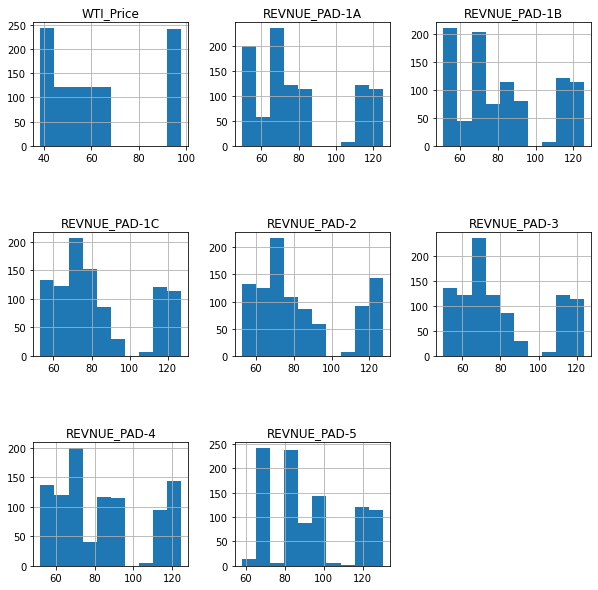

In [26]:
markets_df[['WTI_Price', 'REVNUE_PAD-1A', 'REVNUE_PAD-1B', 'REVNUE_PAD-1C',
            'REVNUE_PAD-2', 'REVNUE_PAD-3', 'REVNUE_PAD-4', 'REVNUE_PAD-5']].hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.7);

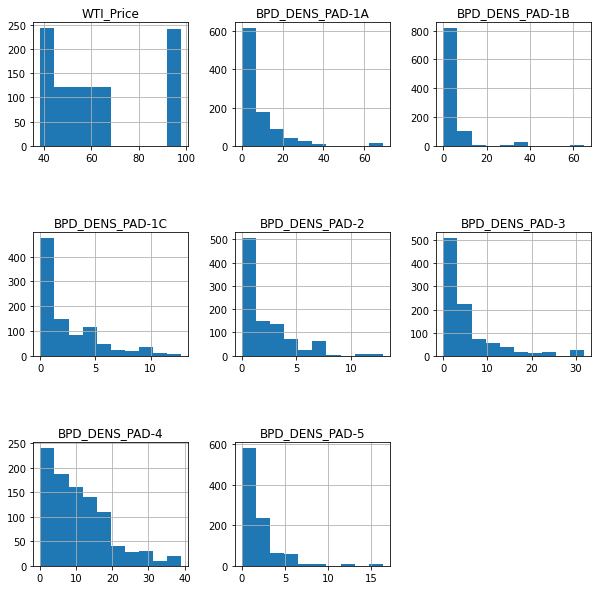

In [27]:
markets_df[['WTI_Price', 'BPD_DENS_PAD-1A', 'BPD_DENS_PAD-1B', 'BPD_DENS_PAD-1C',
            'BPD_DENS_PAD-2', 'BPD_DENS_PAD-3', 'BPD_DENS_PAD-4', 'BPD_DENS_PAD-5',]].hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.7);

## 3.3.4 Numeric Features - Refineries

### 3.3.4.1 Refineries Summary data

In [28]:
rfy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RFY_BPCD,969.0,1.504513e+05,1.364578e+05,2000.000000,4.250000e+04,1.122290e+05,2.250000e+05,6.070000e+05
PAD-1-1,969.0,2.476780e-02,1.554970e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-1-2,969.0,4.127967e-02,1.990390e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-2-1,969.0,1.073271e-01,3.096886e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-2-2,969.0,2.579979e-02,1.586194e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-2-3,969.0,6.604747e-02,2.484933e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-3-2,969.0,2.229102e-01,4.164135e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-3-3,969.0,1.816305e-01,3.857388e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-3-4,969.0,1.651187e-02,1.274990e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PAD-3-5,969.0,1.651187e-02,1.274990e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [29]:
rfy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RFY-PADD           969 non-null    object 
 1   RFY-PAD-Sub        969 non-null    object 
 2   RFY-PAD-District   969 non-null    object 
 3   RFY_ID             969 non-null    object 
 4   RFY_State          969 non-null    object 
 5   RFY_BPCD           969 non-null    int64  
 6   PAD-1-1            969 non-null    int64  
 7   PAD-1-2            969 non-null    int64  
 8   PAD-2-1            969 non-null    int64  
 9   PAD-2-2            969 non-null    int64  
 10  PAD-2-3            969 non-null    int64  
 11  PAD-3-2            969 non-null    int64  
 12  PAD-3-3            969 non-null    int64  
 13  PAD-3-4            969 non-null    int64  
 14  PAD-3-5            969 non-null    int64  
 15  PAD-4              969 non-null    int64  
 16  PAD-5              969 non

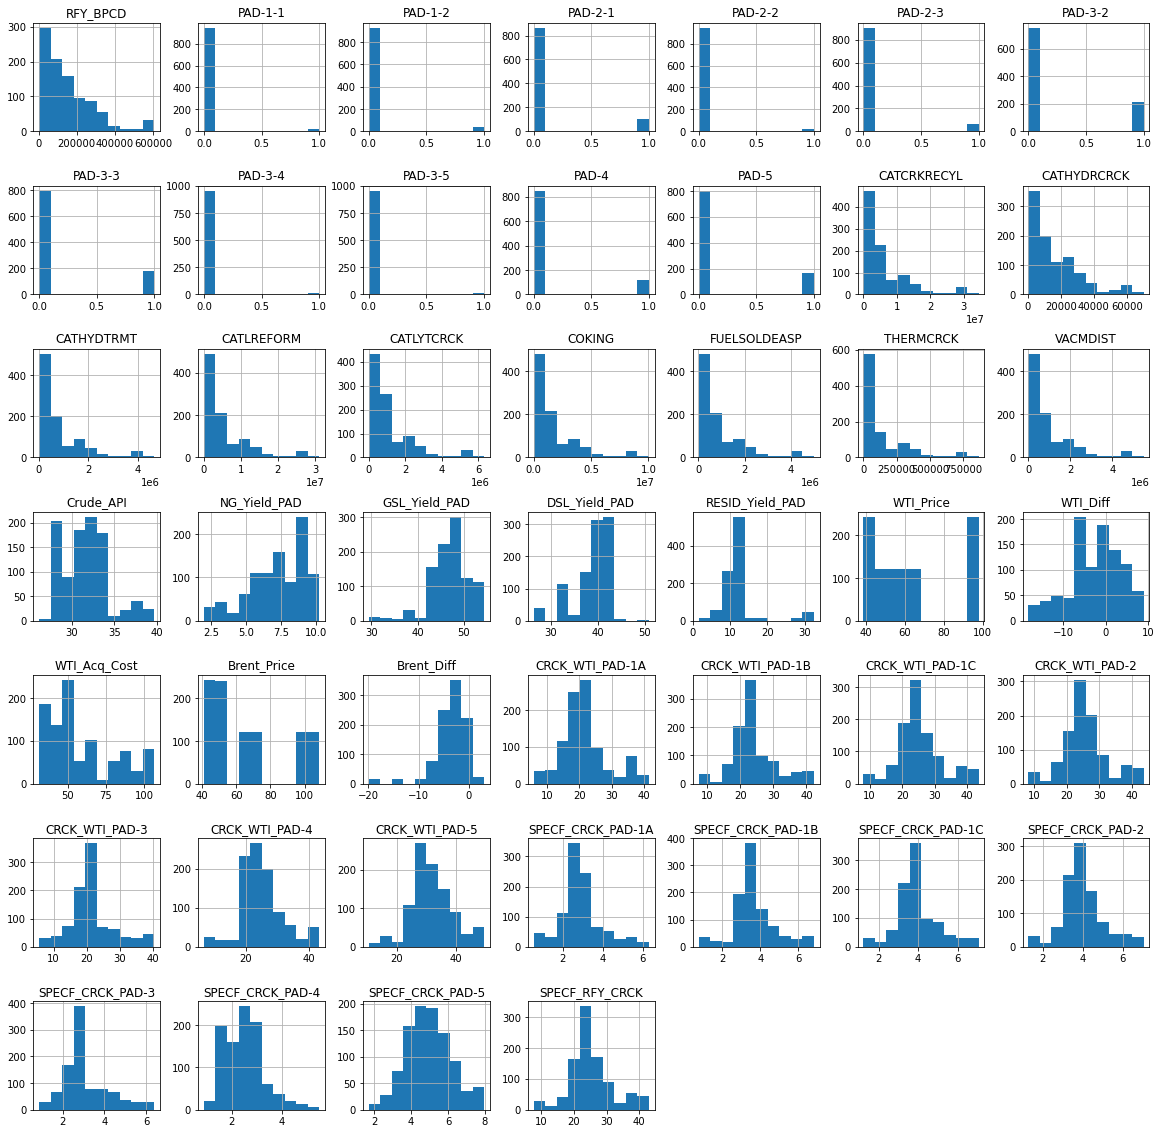

In [30]:
rfy_df.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

### 3.3.4.2 Crack spreads specific to refineries:

In [31]:
# Grouped by State:
rfy_df.groupby('RFY_State')['SPECF_RFY_CRCK'].describe()

,count,mean,std,min,25%,50%,75%,max
RFY_State,,,,,,,,
Alabama,24.0,23.720381,1.846273,20.716714,22.515717,23.414304,25.480744,26.036581
Arkansas,16.0,17.416204,1.552485,14.760297,16.690287,17.510284,18.272277,19.536421
California,120.0,20.428638,1.934157,16.483503,19.192314,21.411154,21.868801,22.372751
Colorado,16.0,33.414682,6.190792,26.265373,29.190938,31.794616,37.472317,42.940409
Delaware,8.0,18.432328,2.011377,15.560367,16.719163,18.689495,19.777449,21.372403
Illinois,32.0,30.905563,5.147059,24.077528,27.339662,29.869303,34.671496,38.873887
Indiana,16.0,30.910581,5.231309,24.083904,27.348665,29.881805,34.673648,38.879346
Kansas,24.0,32.957443,5.594955,25.810512,28.974770,31.925830,37.462284,41.235354
Kentucky,8.0,30.940750,5.407344,24.116197,27.382248,29.926325,34.674354,38.927660


In [32]:
# Grouped by PAD Districts:
rfy_df.groupby('RFY-PAD-District')['SPECF_RFY_CRCK'].describe()

,count,mean,std,min,25%,50%,75%,max
RFY-PAD-District,,,,,,,,
PAD-1-1,24.0,18.452223,1.918959,15.560367,16.739084,18.707212,19.783374,21.398558
PAD-1-2,40.0,10.316311,1.578392,7.786307,9.233197,10.183764,11.251976,13.078402
PAD-2-1,104.0,30.927805,5.085458,24.077528,27.361595,29.914946,34.691535,38.957692
PAD-2-2,25.0,30.186862,4.963217,23.083322,26.480953,28.560852,32.572810,38.206169
PAD-2-3,64.0,32.973437,5.520471,25.810512,28.981927,31.933742,37.495346,41.264434
PAD-3-2,216.0,23.655455,1.850609,20.016596,22.464035,23.658345,25.159624,26.018094
PAD-3-3,176.0,23.726809,1.813885,20.705852,22.517946,23.415723,25.480744,26.038442
PAD-3-4,16.0,17.416204,1.552485,14.760297,16.690287,17.510284,18.272277,19.536421
PAD-3-5,16.0,23.493817,2.402159,19.886425,21.918088,23.846375,25.316085,26.359412


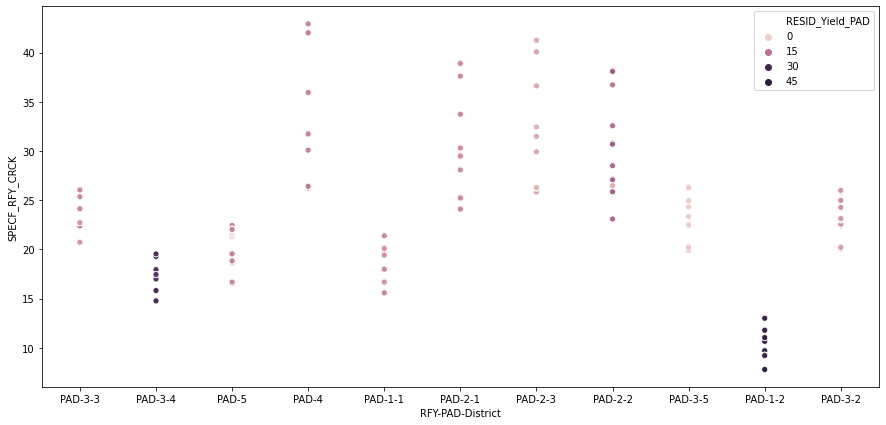

In [33]:
plt.figure(figsize=(15,7))
_ = sns.scatterplot(x='RFY-PAD-District', y='SPECF_RFY_CRCK', hue='RESID_Yield_PAD', data=rfy_df)

## 3.3.5 Feature Values

We identify the feature values as follows:
- 'RFY_BPCD' - refinery operating capacity in Barrels per Calendar Day
- 'DIST_PAD_' - cumulative distances from each refinery to each of the destination markets (PAD Districts)
- 'MRKT_RESIST_PAD_' - a perceived resistance of each destination market to supply; the resistance is a measure of how much BPCD needs to travel to a given destination market per 1MM of its population.
- 'CATCRKRECYL' through 'VACMDIST' are refinery configuration specifics, indicating the type of petroleum products they're capable of yielding from processing raw crude oils
- 'Brent Price' and 'WTI Price' - are crude oil market prices, and the 'Diff' refers to perceived discounts/premiums refineries get. The 'Diffs' are dictated by the going market, but mainly depend on the refineries' geographical locations, i.e., proximity to crude source, whether domestic or imported.
- 'Crude API' - indicates the type of crude oil, e.g., heavy, light, sweet, etc.; this determines the type and yield ratio of petroleum products that could be extracted from it, depending on refinery configuration
- 'Yields' are the expected volumetric ratios of refined petroleum products at refineries; here, grouped into just 4 categories - NG (Propane, Butane), GSL (Naphtha, Gasolines), DSL (kerosene, jet fuel, diesel, some lighter fuel oils), RESID (heavier fuel oils, lubricants, residual oil, etc.)
- 'REVNUE_PAD_' - perceived market value of the refined products at the destination markets; the calculation is based on historical wholesale prices, multiplied by the volumes in a given market district
- 'CRCK_WTI_PAD_' - "crack spread", or a perceived gross profit margin, calculated as the difference between 'REVNUE_' and the 'WTI_Acq_Cost', i.e. between the combined Sales price for all products and WTI crude price market index.

**We will use crack spread as the main indicator of economic feasibility of a given refinery.**

- 'SPECF_RFY_CRCK' - the ultimate crack spread a given refinery is likely to achieve, given the potential crack spreads at each of the 7 destination markets (PAD Districts), but conditioned by the market resistance

**We will use the 'SPECF_RFY_CRCK' as the target variable during the modeling stage.**

### 3.3.5.1 Distances between Refineries and Markets by PAD district

#### Refineries to Destination Markets

In [34]:
distances = data.iloc[:,np.r_[41:48]]

#### Distribution of cumulative "Refinery to Destination Market" distances by PAD districts

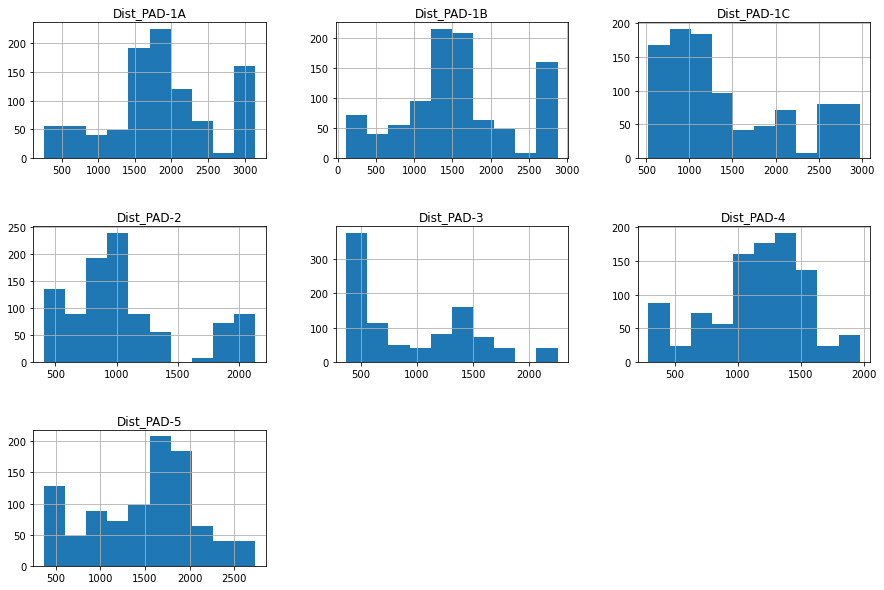

In [35]:
distances.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

### 3.3.5.2 Refinery Supply Pressure and Market Resistance

#### "Refinery Supply Pressure to Markets" vs. "Product Supply per capita at Markets" vs. Market Resistance

In [36]:
supply_pressure = data.iloc[:,np.r_[48:70]]

#### Distribution of Refinery Supply Pressure, Supply per capita at Markets, and Market Resistance

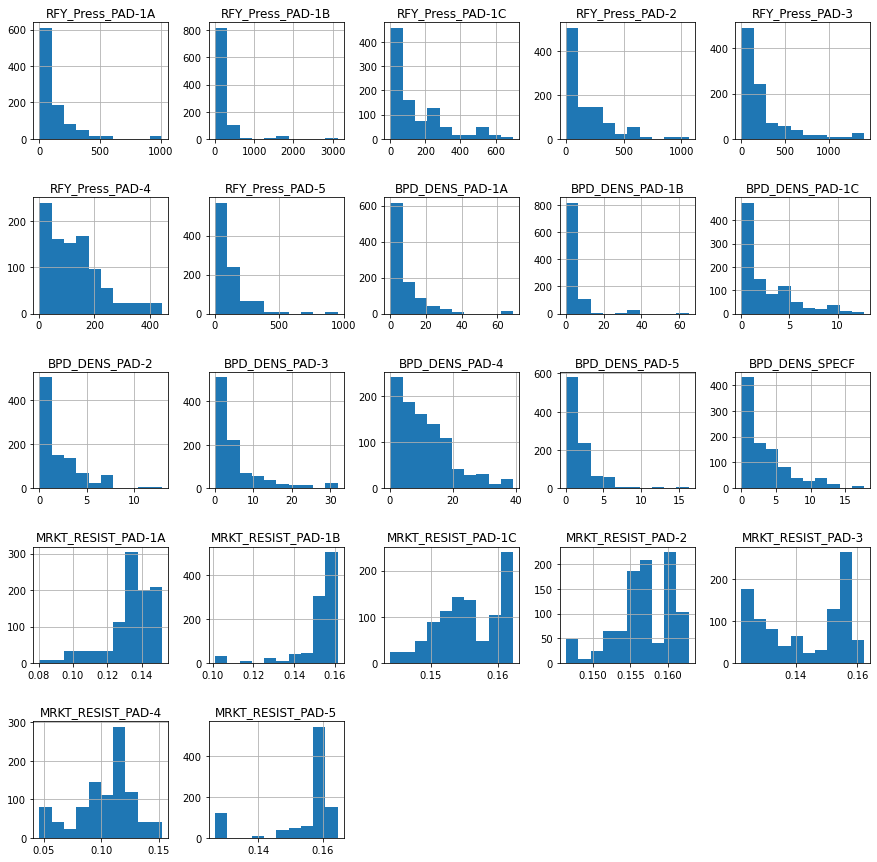

In [37]:
supply_pressure.hist(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5);

#### Reduce redundant feature variables
It is apparent from the histrogram subplots that the variables for "Refinery Pressure to Markets" and "Product Supply per capita at Markets" look identical, even thought their absolute values are different.

We will keep just the first set ('RFY_Press_') for use during Feature Engineering and drop the second ('BPD_DENS_').

In [38]:
supply_pressure = data.iloc[:,np.r_[55:70]]

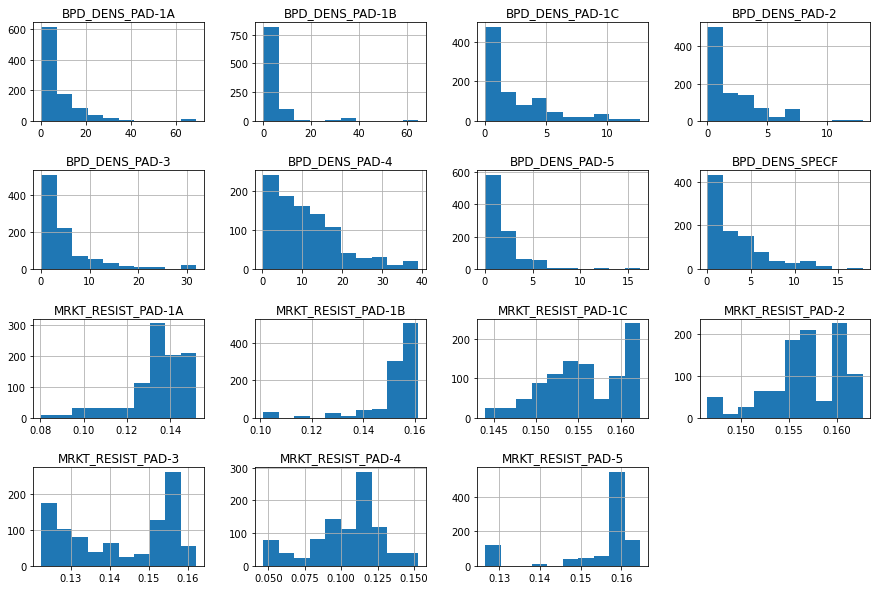

In [39]:
supply_pressure.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

# 3.4. Visualizing Correlations

#### Now let's look at some correlations:
* between refinery and market PAD districts
* between specific refineries and the features

## 3.4.1 Market Variables Correlations

### 3.4.1.1 Scale the Data

In [40]:
# get refinery PAD District to use as index 'RFY-PAD-District'
rfy_PAD_labels = data['RFY-PAD-District']

In [41]:
# store column names:
markets_summary_columns = markets_summary.columns

In [42]:
# scale the markets data - generates an ndarray
markets_summary_scale = scale(markets_summary)

In [43]:
# construct a dataframe using the ndarray and stored column names:
markets_summary_scaled_df = pd.DataFrame(markets_summary_scale, columns=markets_summary_columns)
markets_summary_scaled_df.head()

,BPD_DENS_PAD-1A,BPD_DENS_PAD-1B,BPD_DENS_PAD-1C,BPD_DENS_PAD-2,BPD_DENS_PAD-3,BPD_DENS_PAD-4,BPD_DENS_PAD-5,BPD_DENS_SPECF,MRKT_RESIST_PAD-1A,MRKT_RESIST_PAD-1B,...,MRKT_RESIST_PAD-3,MRKT_RESIST_PAD-4,MRKT_RESIST_PAD-5,REVNUE_PAD-1A,REVNUE_PAD-1B,REVNUE_PAD-1C,REVNUE_PAD-2,REVNUE_PAD-3,REVNUE_PAD-4,REVNUE_PAD-5
0,-0.339491,-0.283161,-0.048784,-0.393058,-0.298065,-0.717706,-0.544856,-0.443520,-0.516615,-0.140850,...,-0.409659,0.820183,0.521052,1.742152,1.741476,1.773219,1.740967,1.782366,1.701919,1.728752
1,-0.484836,-0.354176,-0.377623,-0.566903,-0.543229,-0.945714,-0.684249,-0.670689,-0.635382,-0.257517,...,-0.098126,0.851036,0.563520,1.742152,1.741476,1.773219,1.740967,1.782366,1.701919,1.728752
2,-0.704112,-0.474517,-0.878673,-0.895823,-0.777495,-1.241745,-0.843441,-0.984518,-0.590233,-0.187473,...,-0.286369,0.855637,0.533091,1.742152,1.741476,1.773219,1.740967,1.782366,1.701919,1.728752
3,-0.395284,-0.316721,-0.326606,-0.319805,-0.153713,-0.620122,-0.504344,-0.438662,-0.051188,0.108169,...,-0.988274,0.562649,0.454602,1.414767,1.403731,1.431713,1.404404,1.465864,1.371391,1.322060
4,-0.692969,-0.469113,-0.868832,-0.865828,-0.743072,-1.208606,-0.826012,-0.959980,-0.070589,0.097664,...,-0.926765,0.550785,0.451804,1.414767,1.403731,1.431713,1.404404,1.465864,1.371391,1.322060


#### 3.4.1.2 Verify Scaling

In [44]:
markets_summary_scaled_df.mean()

BPD_DENS_PAD-1A       4.124668e-17
BPD_DENS_PAD-1B       6.003683e-17
BPD_DENS_PAD-1C       7.149424e-17
BPD_DENS_PAD-2       -8.054559e-17
BPD_DENS_PAD-3        6.301575e-17
BPD_DENS_PAD-4       -6.656755e-17
BPD_DENS_PAD-5        1.253441e-16
BPD_DENS_SPECF        1.356557e-16
MRKT_RESIST_PAD-1A    9.951333e-16
MRKT_RESIST_PAD-1B   -5.254368e-16
MRKT_RESIST_PAD-1C   -5.296531e-15
MRKT_RESIST_PAD-2     5.216931e-15
MRKT_RESIST_PAD-3    -4.215181e-16
MRKT_RESIST_PAD-4    -3.821046e-16
MRKT_RESIST_PAD-5     5.777399e-16
REVNUE_PAD-1A         3.169120e-16
REVNUE_PAD-1B        -5.213122e-16
REVNUE_PAD-1C         2.078145e-15
REVNUE_PAD-2          1.363661e-15
REVNUE_PAD-3         -2.330437e-16
REVNUE_PAD-4         -3.247030e-16
REVNUE_PAD-5          8.742004e-16
dtype: float64

In [45]:
markets_summary_scaled_df.std()

BPD_DENS_PAD-1A       1.000516
BPD_DENS_PAD-1B       1.000516
BPD_DENS_PAD-1C       1.000516
BPD_DENS_PAD-2        1.000516
BPD_DENS_PAD-3        1.000516
BPD_DENS_PAD-4        1.000516
BPD_DENS_PAD-5        1.000516
BPD_DENS_SPECF        1.000516
MRKT_RESIST_PAD-1A    1.000516
MRKT_RESIST_PAD-1B    1.000516
MRKT_RESIST_PAD-1C    1.000516
MRKT_RESIST_PAD-2     1.000516
MRKT_RESIST_PAD-3     1.000516
MRKT_RESIST_PAD-4     1.000516
MRKT_RESIST_PAD-5     1.000516
REVNUE_PAD-1A         1.000516
REVNUE_PAD-1B         1.000516
REVNUE_PAD-1C         1.000516
REVNUE_PAD-2          1.000516
REVNUE_PAD-3          1.000516
REVNUE_PAD-4          1.000516
REVNUE_PAD-5          1.000516
dtype: float64

Scaling verification is good - mean is close to zero and standard deviation is close to 1

#### 3.4.1.3 PCA

##### Fit the PCA transformation

In [46]:
markets_pca = PCA().fit(markets_summary_scale)

##### Plot PCA

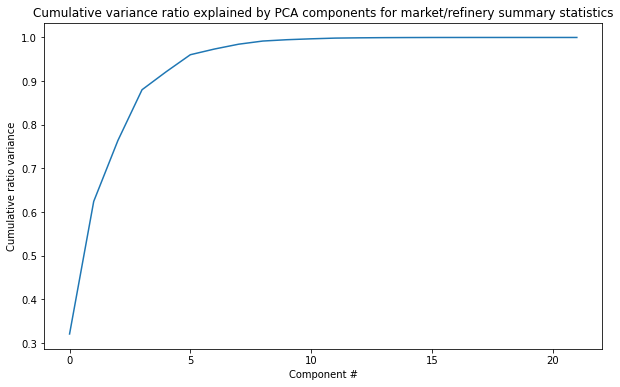

In [47]:
plt.subplots(figsize=(10, 6))
plt.plot(markets_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for market/refinery summary statistics');

Apply PCA transformation to markets summary data and obtain derived features

In [48]:
markets_pca_x = markets_pca.transform(markets_summary_scale)

In [49]:
markets_pca_x.shape

(969, 22)

Plot the first two derived features

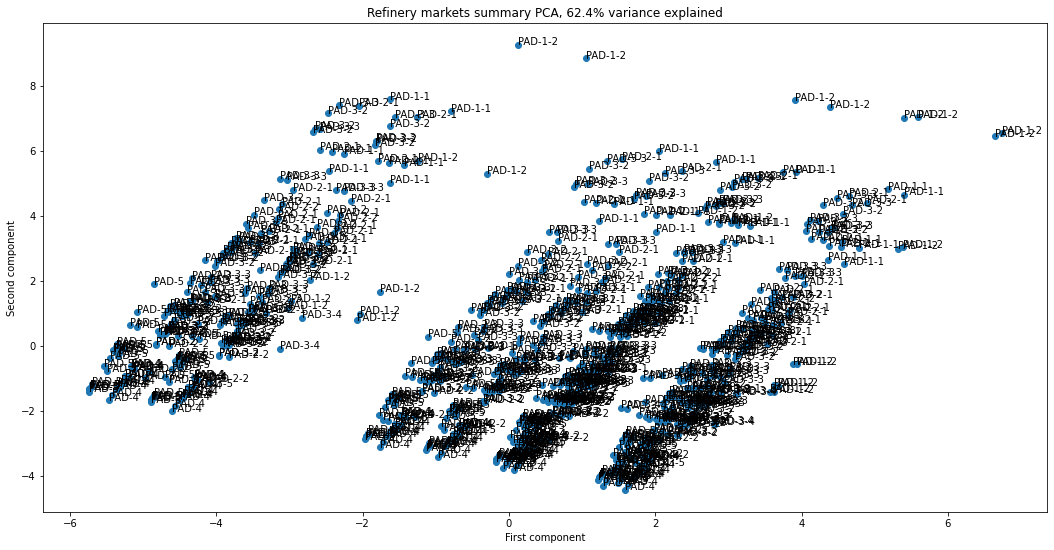

In [50]:
x = markets_pca_x[:, 0]
y = markets_pca_x[:, 1]

refinery_target = rfy_PAD_labels

pc_var = 100 * markets_pca.explained_variance_ratio_.cumsum()[1]

plt.subplots(figsize=(18,9))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Refinery markets summary PCA, {pc_var:.1f}% variance explained')

for s, x, y in zip(refinery_target, x, y):
    plt.annotate(s, (x, y))

##### Add specific refinery aggregate crackspreads to PCA scatter plot

In [51]:
# PCA dataframe:
pca_df = pd.DataFrame({'PC1': markets_pca_x[:,0], 'PC2': markets_pca_x[:,1]}, index=refinery_target)
pca_df.head()

,PC1,PC2
RFY-PAD-District,,
PAD-3-3,-4.084519,1.946419
PAD-3-3,-4.157284,1.665056
PAD-3-3,-4.394439,0.988520
PAD-3-4,-3.482732,1.123108
PAD-3-4,-3.796400,0.164473


In [52]:
rfy_crack = data[['RFY-PAD-District','SPECF_RFY_CRCK']]

# set Refinery PAD District as index
rfy_crack = rfy_crack.set_index('RFY-PAD-District')

In [53]:
rfy_crack.head(3)

,SPECF_RFY_CRCK
RFY-PAD-District,
PAD-3-3,22.575311
PAD-3-3,22.567569
PAD-3-3,22.571499


In [54]:
pca_df.head(3)

,PC1,PC2
RFY-PAD-District,,
PAD-3-3,-4.084519,1.946419
PAD-3-3,-4.157284,1.665056
PAD-3-3,-4.394439,0.988520


Concatenate PCA components and Specific Refinery Crackspreads into one dataframe - on a RFY PAD District index

In [55]:
pca_crack_df = pd.concat([pca_df, rfy_crack], axis=1)
pca_crack_df.head()

,PC1,PC2,SPECF_RFY_CRCK
RFY-PAD-District,,,
PAD-3-3,-4.084519,1.946419,22.575311
PAD-3-3,-4.157284,1.665056,22.567569
PAD-3-3,-4.394439,0.988520,22.571499
PAD-3-4,-3.482732,1.123108,14.761021
PAD-3-4,-3.796400,0.164473,14.760297


Separate the crack spread distribution into quartiles

In [56]:
pca_crack_q_series = pd.cut(pca_crack_df['SPECF_RFY_CRCK'], 4, precision=1)
pca_crack_df['Quartile'] = pca_crack_q_series
pca_crack_df.head()

,PC1,PC2,SPECF_RFY_CRCK,Quartile
RFY-PAD-District,,,,
PAD-3-3,-4.084519,1.946419,22.575311,"(16.6, 25.4]"
PAD-3-3,-4.157284,1.665056,22.567569,"(16.6, 25.4]"
PAD-3-3,-4.394439,0.988520,22.571499,"(16.6, 25.4]"
PAD-3-4,-3.482732,1.123108,14.761021,"(7.8, 16.6]"
PAD-3-4,-3.796400,0.164473,14.760297,"(7.8, 16.6]"


In [57]:
pca_crack_df.dtypes

PC1                float64
PC2                float64
SPECF_RFY_CRCK     float64
Quartile          category
dtype: object

##### Recreate the PCA scatter plot with refinery crack spread values

In [58]:
pca_crack_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, PAD-3-3 to PAD-2-2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PC1             969 non-null    float64 
 1   PC2             969 non-null    float64 
 2   SPECF_RFY_CRCK  969 non-null    float64 
 3   Quartile        969 non-null    category
dtypes: category(1), float64(3)
memory usage: 31.4+ KB


In [59]:
# only get the first 121 refinery observations (Series 1) for a clearer chart
pca_crack_df_121 = pca_crack_df.iloc[np.r_[0:121],:]

In [60]:
pca_crack_df_121.shape

(121, 4)

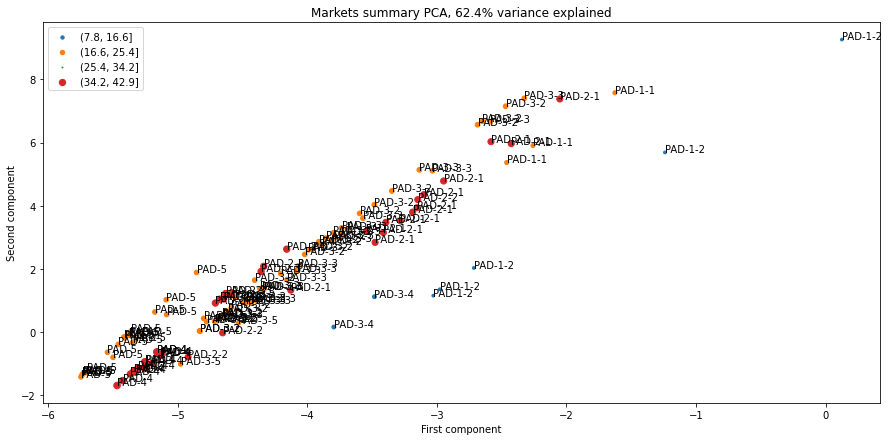

In [61]:
# only get 121 refineries from Series 1 out of 8 for a clearer chart
x = pca_crack_df_121.PC1
y = pca_crack_df_121.PC2

crack = pca_crack_df_121.SPECF_RFY_CRCK
quartiles = pca_crack_df_121.Quartile
market = pca_crack_df_121.index

pc_var = 100 * markets_pca.explained_variance_ratio_.cumsum()[1]

fig, ax = plt.subplots(figsize=(15,7))

for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=crack[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')

plt.legend()
ax.set_title(f'Markets summary PCA, {pc_var:.1f}% variance explained')

for s, x, y in zip(market, x, y):
    plt.annotate(s, (x, y))

There's a pattern how the quartile values of crack spreads, achieved by specific refineries are distributed across the PAD districts

##### Recreate the PCA plot using seaborn:

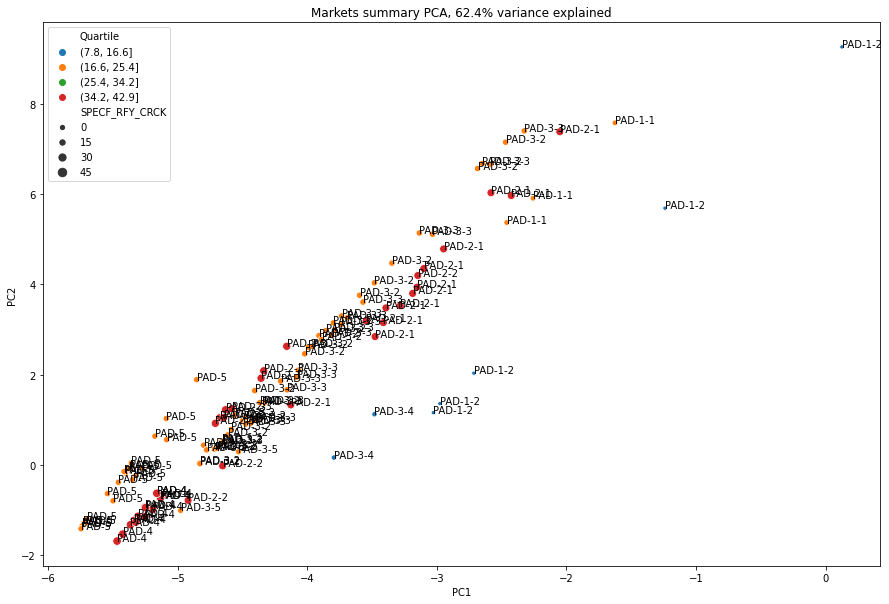

In [62]:
x = pca_crack_df_121.PC1
y = pca_crack_df_121.PC2

market = pca_crack_df_121.index

plt.subplots(figsize=(15, 10))

sns.scatterplot(x='PC1', y='PC2', size='SPECF_RFY_CRCK', hue='Quartile', 
                 hue_order=pca_crack_df_121.Quartile.cat.categories, data=pca_crack_df_121)

for s, x, y in zip(market, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Markets summary PCA, {pc_var:.1f}% variance explained');

##### Conclusion on the PCA analysis of the market districts
There is a clear grouping of refinery economic performance, depending on their target markets

## 3.4.2 Refinery Variables Correlations

In [63]:
rfy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RFY-PADD           969 non-null    object 
 1   RFY-PAD-Sub        969 non-null    object 
 2   RFY-PAD-District   969 non-null    object 
 3   RFY_ID             969 non-null    object 
 4   RFY_State          969 non-null    object 
 5   RFY_BPCD           969 non-null    int64  
 6   PAD-1-1            969 non-null    int64  
 7   PAD-1-2            969 non-null    int64  
 8   PAD-2-1            969 non-null    int64  
 9   PAD-2-2            969 non-null    int64  
 10  PAD-2-3            969 non-null    int64  
 11  PAD-3-2            969 non-null    int64  
 12  PAD-3-3            969 non-null    int64  
 13  PAD-3-4            969 non-null    int64  
 14  PAD-3-5            969 non-null    int64  
 15  PAD-4              969 non-null    int64  
 16  PAD-5              969 non

### 3.4.2.1 Visualize correlations for Refineries

Let's select some useful variables for vizualizing correlations between refinery specific variables

#### Let's see how refinery configurations and the Crude APIs correlate with the refined product yields
- Refinery configuration variables: 'CATCRKRECYL' through 'VACMDIST'
- Crude characteristics: 'CRUDE_API'
- Yeields: 'GSL_Yield' and 'DSL_Yield'; we will omit the 'NG' and 'RESID', as in this analysis, we mainly are concerned with the high-value products, which are gasolines and diesel fractions

In [64]:
rfy_corr = rfy_df.iloc[:, np.r_[5, 17:26, 26:31]]
rfy_corr.tail()

,RFY_BPCD,CATCRKRECYL,CATHYDRCRCK,CATHYDTRMT,CATLREFORM,CATLYTCRCK,COKING,FUELSOLDEASP,THERMCRCK,VACMDIST,Crude_API,NG_Yield_PAD,GSL_Yield_PAD,DSL_Yield_PAD,RESID_Yield_PAD
964,48000,8.282035e+05,2226.594187,67357.271396,6.757546e+05,143330.007739,247118.388050,91469.384330,6713.349309,98428.889780,32.240000,5.281818,46.790909,38.481818,13.654545
965,24500,4.227289e+05,1136.490783,34380.273942,3.449164e+05,73158.024783,126133.343901,46687.498252,3426.605376,50239.745825,32.240000,5.281818,46.790909,38.481818,13.654545
966,18000,3.105763e+05,834.972820,25258.976774,2.534080e+05,53748.752902,92669.395519,34301.019124,2517.505991,36910.833667,32.240000,5.281818,46.790909,38.481818,13.654545
967,3000,5.176272e+04,139.162137,4209.829462,4.223466e+04,8958.125484,15444.899253,5716.836521,419.584332,6151.805611,32.240000,5.281818,46.790909,38.481818,13.654545
968,50000,1.549808e+06,5576.470588,134011.764706,1.435487e+06,317985.176471,479624.117647,195541.764706,7888.235294,213630.000000,26.115455,2.550000,41.750000,50.880000,6.770000


In [65]:
rfy_corr.corr(method='pearson')

,RFY_BPCD,CATCRKRECYL,CATHYDRCRCK,CATHYDTRMT,CATLREFORM,CATLYTCRCK,COKING,FUELSOLDEASP,THERMCRCK,VACMDIST,Crude_API,NG_Yield_PAD,GSL_Yield_PAD,DSL_Yield_PAD,RESID_Yield_PAD
RFY_BPCD,1.000000,0.853513,0.913024,0.830573,0.856361,0.867730,0.862786,0.848161,0.784814,0.848070,-0.064714,0.303445,0.048525,0.010061,-0.101745
CATCRKRECYL,0.853513,1.000000,0.920862,0.989414,0.999891,0.999257,0.999244,0.997338,0.976594,0.997107,-0.037055,0.376404,-0.176847,0.277568,-0.171108
CATHYDRCRCK,0.913024,0.920862,1.000000,0.926849,0.919986,0.928382,0.919359,0.931750,0.873954,0.932248,-0.123548,0.274732,-0.036797,0.200394,-0.152636
CATHYDTRMT,0.830573,0.989414,0.926849,1.000000,0.987720,0.985529,0.984902,0.997042,0.991156,0.997246,-0.113086,0.395819,-0.209573,0.317577,-0.163816
CATLREFORM,0.856361,0.999891,0.919986,0.987720,1.000000,0.999561,0.999680,0.996407,0.974961,0.996147,-0.031609,0.373551,-0.177026,0.271258,-0.167569
CATLYTCRCK,0.867730,0.999257,0.928382,0.985529,0.999561,1.000000,0.999615,0.995381,0.969589,0.995117,-0.028159,0.364259,-0.165175,0.259922,-0.165482
COKING,0.862786,0.999244,0.919359,0.984902,0.999680,0.999615,1.000000,0.994581,0.972343,0.994282,-0.022722,0.364808,-0.178494,0.258971,-0.158665
FUELSOLDEASP,0.848161,0.997338,0.931750,0.997042,0.996407,0.995381,0.994581,1.000000,0.983855,0.999995,-0.076283,0.385806,-0.184009,0.297290,-0.172237
THERMCRCK,0.784814,0.976594,0.873954,0.991156,0.974961,0.969589,0.972343,0.983855,1.000000,0.984026,-0.113714,0.410914,-0.280770,0.330729,-0.134959
VACMDIST,0.848070,0.997107,0.932248,0.997246,0.996147,0.995117,0.994282,0.999995,0.984026,1.000000,-0.077972,0.386002,-0.184321,0.297829,-0.172027


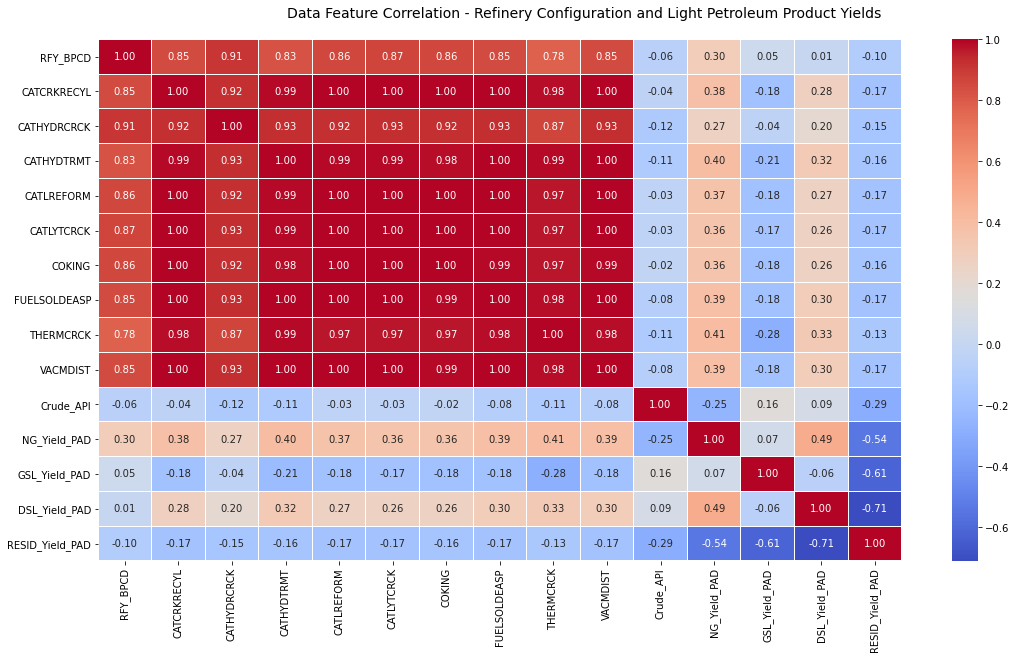

In [66]:
rfy_corr_mtrx1 = rfy_corr.corr()
f, ax = plt.subplots(figsize=(18,9))

hm = sns.heatmap(round(rfy_corr_mtrx1,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidth=.05)

f.subplots_adjust(top=0.93)
t = f.suptitle('Data Feature Correlation - Refinery Configuration and Light Petroleum Product Yields', fontsize=14)

In [67]:
rfy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RFY-PADD           969 non-null    object 
 1   RFY-PAD-Sub        969 non-null    object 
 2   RFY-PAD-District   969 non-null    object 
 3   RFY_ID             969 non-null    object 
 4   RFY_State          969 non-null    object 
 5   RFY_BPCD           969 non-null    int64  
 6   PAD-1-1            969 non-null    int64  
 7   PAD-1-2            969 non-null    int64  
 8   PAD-2-1            969 non-null    int64  
 9   PAD-2-2            969 non-null    int64  
 10  PAD-2-3            969 non-null    int64  
 11  PAD-3-2            969 non-null    int64  
 12  PAD-3-3            969 non-null    int64  
 13  PAD-3-4            969 non-null    int64  
 14  PAD-3-5            969 non-null    int64  
 15  PAD-4              969 non-null    int64  
 16  PAD-5              969 non

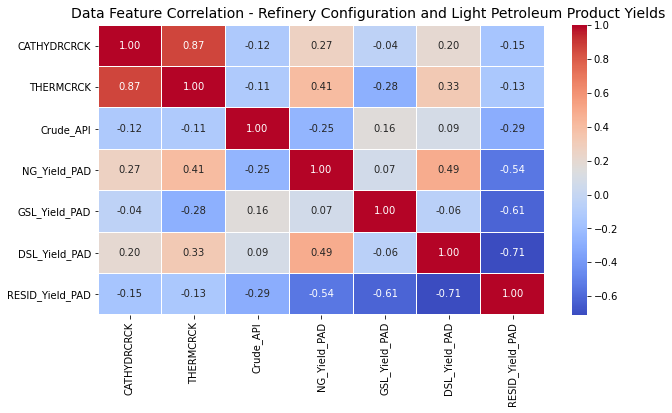

In [68]:
# Re-run with fewver refinery configuration parameters - only keep those that show to have high impact in the yields
# Keep: 'Crude_API', 'THERMCRCK', and 'CATHYDRCRCK' as explanatory variables for the yield values:
rfy_corr_mtrx2 = rfy_df.iloc[:, np.r_[18, 24, 26:31]].corr()

f, ax = plt.subplots(figsize=(10,5))

hm = sns.heatmap(round(rfy_corr_mtrx2,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidth=.05)

f.subplots_adjust(top=0.93)
t = f.suptitle('Data Feature Correlation - Refinery Configuration and Light Petroleum Product Yields', fontsize=14)

In [69]:
# select refinery configuration parameters that seem to have clear impact on the yields distribution
rfy_yields_corr = rfy_df.iloc[:, np.r_[18, 19, 24, 26, 28:31]]
rfy_yields_corr.tail()

,CATHYDRCRCK,CATHYDTRMT,THERMCRCK,Crude_API,GSL_Yield_PAD,DSL_Yield_PAD,RESID_Yield_PAD
964,2226.594187,67357.271396,6713.349309,32.240000,46.790909,38.481818,13.654545
965,1136.490783,34380.273942,3426.605376,32.240000,46.790909,38.481818,13.654545
966,834.972820,25258.976774,2517.505991,32.240000,46.790909,38.481818,13.654545
967,139.162137,4209.829462,419.584332,32.240000,46.790909,38.481818,13.654545
968,5576.470588,134011.764706,7888.235294,26.115455,41.750000,50.880000,6.770000


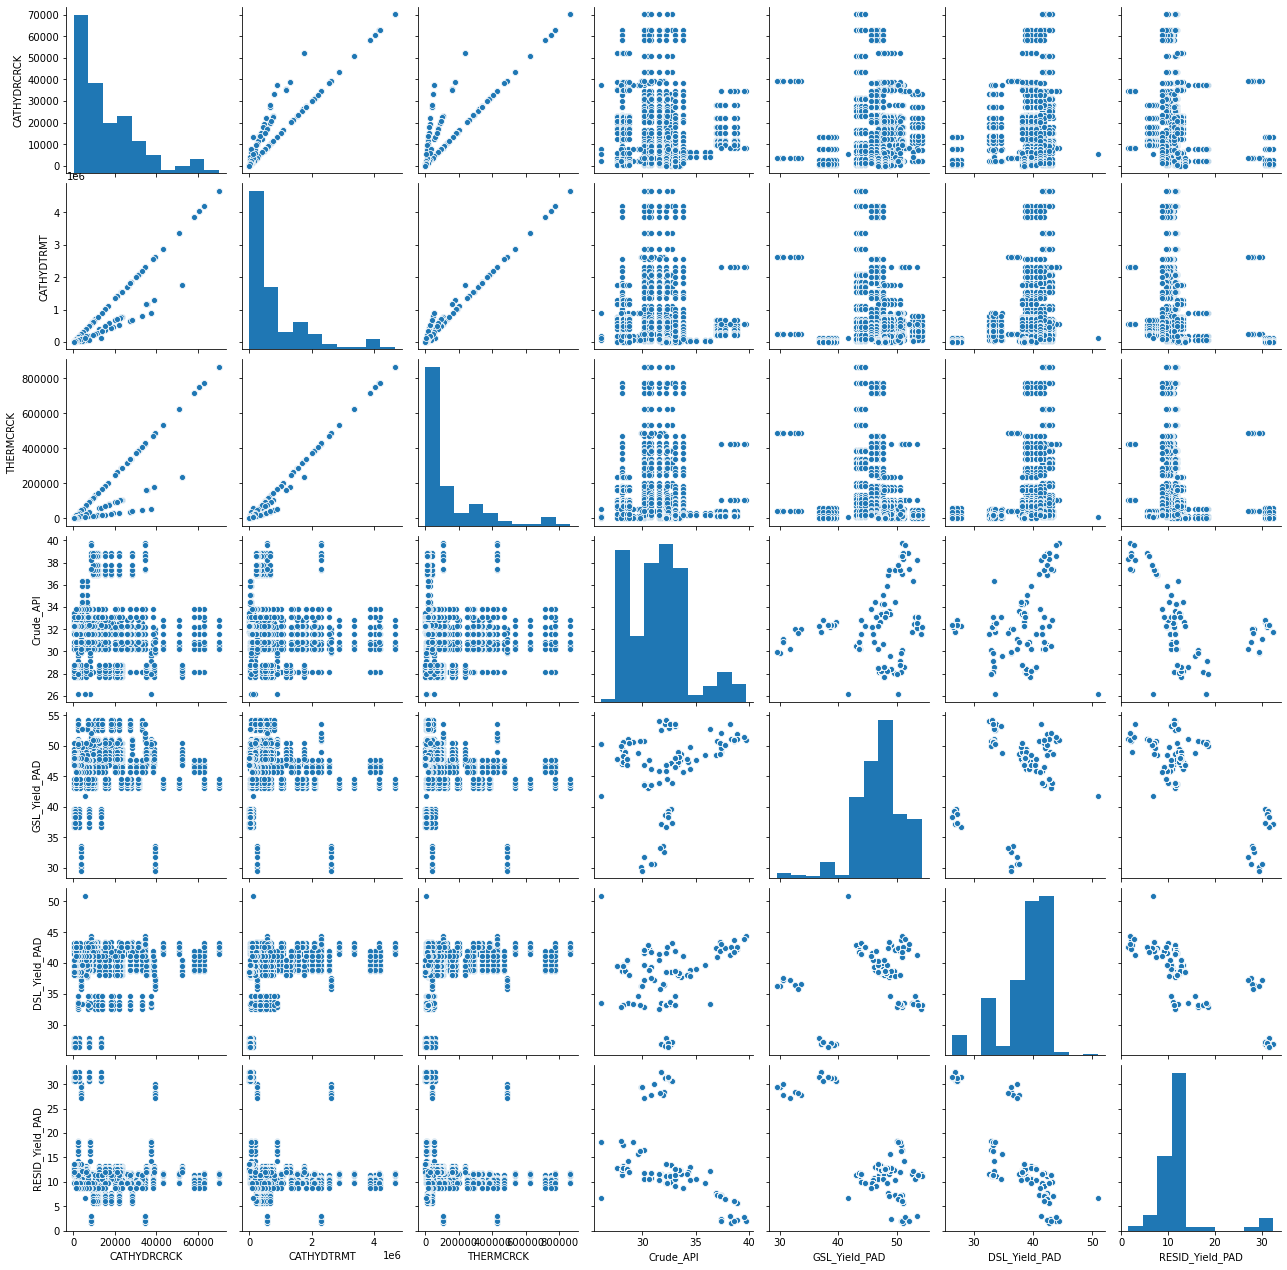

In [70]:
sns.pairplot(rfy_yields_corr, palette='Set1')
plt.show()

# 3.5 Feature Engineering

## 3.5.1 Merge refinery and markets features

In [71]:
# *TEMP*
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Series              969 non-null    object 
 1   RFY-PADD            969 non-null    object 
 2   RFY-PAD-Sub         969 non-null    object 
 3   RFY-PAD-District    969 non-null    object 
 4   RFY_ID              969 non-null    object 
 5   RFY_State           969 non-null    object 
 6   RFY_BPCD            969 non-null    int64  
 7   CATCRKRECYL         969 non-null    float64
 8   CATHYDRCRCK         969 non-null    float64
 9   CATHYDTRMT          969 non-null    float64
 10  CATLREFORM          969 non-null    float64
 11  CATLYTCRCK          969 non-null    float64
 12  COKING              969 non-null    float64
 13  FUELSOLDEASP        969 non-null    float64
 14  THERMCRCK           969 non-null    float64
 15  VACMDIST            969 non-null    float64
 16  Crude_AP

### 3.5.1.1 Cleaned up Dataframe for Refinery Feature Values

In [72]:
# dataframe with finalized selection of feature variables for Refinery summary data
refinery_summary = data.iloc[:,np.r_[1:55, 77:88]]
refinery_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RFY-PADD           969 non-null    object 
 1   RFY-PAD-Sub        969 non-null    object 
 2   RFY-PAD-District   969 non-null    object 
 3   RFY_ID             969 non-null    object 
 4   RFY_State          969 non-null    object 
 5   RFY_BPCD           969 non-null    int64  
 6   CATCRKRECYL        969 non-null    float64
 7   CATHYDRCRCK        969 non-null    float64
 8   CATHYDTRMT         969 non-null    float64
 9   CATLREFORM         969 non-null    float64
 10  CATLYTCRCK         969 non-null    float64
 11  COKING             969 non-null    float64
 12  FUELSOLDEASP       969 non-null    float64
 13  THERMCRCK          969 non-null    float64
 14  VACMDIST           969 non-null    float64
 15  Crude_API          969 non-null    float64
 16  NG_Yield_PAD       969 non

### 3.5.1.2 Cleaned up Dataframe for Market Feature Values

In [73]:
# dataframe with finalized selection of feature variables for Market summary data
markets_summary = data.iloc[:,np.r_[55:77]]
markets_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BPD_DENS_PAD-1A     969 non-null    float64
 1   BPD_DENS_PAD-1B     969 non-null    float64
 2   BPD_DENS_PAD-1C     969 non-null    float64
 3   BPD_DENS_PAD-2      969 non-null    float64
 4   BPD_DENS_PAD-3      969 non-null    float64
 5   BPD_DENS_PAD-4      969 non-null    float64
 6   BPD_DENS_PAD-5      969 non-null    float64
 7   BPD_DENS_SPECF      969 non-null    float64
 8   MRKT_RESIST_PAD-1A  969 non-null    float64
 9   MRKT_RESIST_PAD-1B  969 non-null    float64
 10  MRKT_RESIST_PAD-1C  969 non-null    float64
 11  MRKT_RESIST_PAD-2   969 non-null    float64
 12  MRKT_RESIST_PAD-3   969 non-null    float64
 13  MRKT_RESIST_PAD-4   969 non-null    float64
 14  MRKT_RESIST_PAD-5   969 non-null    float64
 15  REVNUE_PAD-1A       969 non-null    float64
 16  REVNUE_P

### 3.5.1.3 Merge into one dataframe

In [74]:
data_df = pd.merge(refinery_summary, markets_summary, left_index=True, right_index=True)

In [75]:
data_df = data_df.set_index('RFY_State')

In [76]:
data_df.head(3)

,RFY-PADD,RFY-PAD-Sub,RFY-PAD-District,RFY_ID,RFY_BPCD,CATCRKRECYL,CATHYDRCRCK,CATHYDTRMT,CATLREFORM,CATLYTCRCK,...,MRKT_RESIST_PAD-3,MRKT_RESIST_PAD-4,MRKT_RESIST_PAD-5,REVNUE_PAD-1A,REVNUE_PAD-1B,REVNUE_PAD-1C,REVNUE_PAD-2,REVNUE_PAD-3,REVNUE_PAD-4,REVNUE_PAD-5
RFY_State,,,,,,,,,,,,,,,,,,,,,
Alabama,PAD-3,PAD-3,PAD-3-3,RFY-001,87500,5.209266e+06,10611.618976,707276.743844,4.715335e+06,955475.108238,...,0.137156,0.124693,0.160174,122.51066,123.330781,124.992763,124.984516,121.807617,122.431893,127.847838
Alabama,PAD-3,PAD-3,PAD-3-3,RFY-002,48000,2.857654e+06,5821.230981,387991.813766,2.586698e+06,524146.345090,...,0.141351,0.125477,0.160625,122.51066,123.330781,124.992763,124.984516,121.807617,122.431893,127.847838
Alabama,PAD-3,PAD-3,PAD-3-3,RFY-003,4100,2.440913e+05,497.230146,33140.967426,2.209471e+05,44770.833643,...,0.138816,0.125594,0.160302,122.51066,123.330781,124.992763,124.984516,121.807617,122.431893,127.847838


### Select features for the correlation heatmap:

In [77]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, Alabama to North Dakota
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RFY-PADD            969 non-null    object 
 1   RFY-PAD-Sub         969 non-null    object 
 2   RFY-PAD-District    969 non-null    object 
 3   RFY_ID              969 non-null    object 
 4   RFY_BPCD            969 non-null    int64  
 5   CATCRKRECYL         969 non-null    float64
 6   CATHYDRCRCK         969 non-null    float64
 7   CATHYDTRMT          969 non-null    float64
 8   CATLREFORM          969 non-null    float64
 9   CATLYTCRCK          969 non-null    float64
 10  COKING              969 non-null    float64
 11  FUELSOLDEASP        969 non-null    float64
 12  THERMCRCK           969 non-null    float64
 13  VACMDIST            969 non-null    float64
 14  Crude_API           969 non-null    float64
 15  NG_Yield_PAD        969 non-null    float64
 16

In [78]:
data_df_mtrx = data_df.iloc[:,np.r_[14:24, 72:79, 31:39]]
data_df_mtrx.head(3).T

RFY_State,Alabama,Alabama,Alabama
Crude_API,30.170833,30.170833,30.170833
NG_Yield_PAD,9.083333,9.083333,9.083333
GSL_Yield_PAD,43.775000,43.775000,43.775000
DSL_Yield_PAD,41.591667,41.591667,41.591667
RESID_Yield_PAD,11.825000,11.825000,11.825000
WTI_Price,97.905833,97.905833,97.905833
WTI_Diff,3.645833,3.645833,3.645833
WTI_Acq_Cost,101.551667,101.551667,101.551667
Brent_Price,108.637500,108.637500,108.637500
Brent_Diff,-3.895833,-3.895833,-3.895833


### 3.5.1 Feature Correlation Heatmap

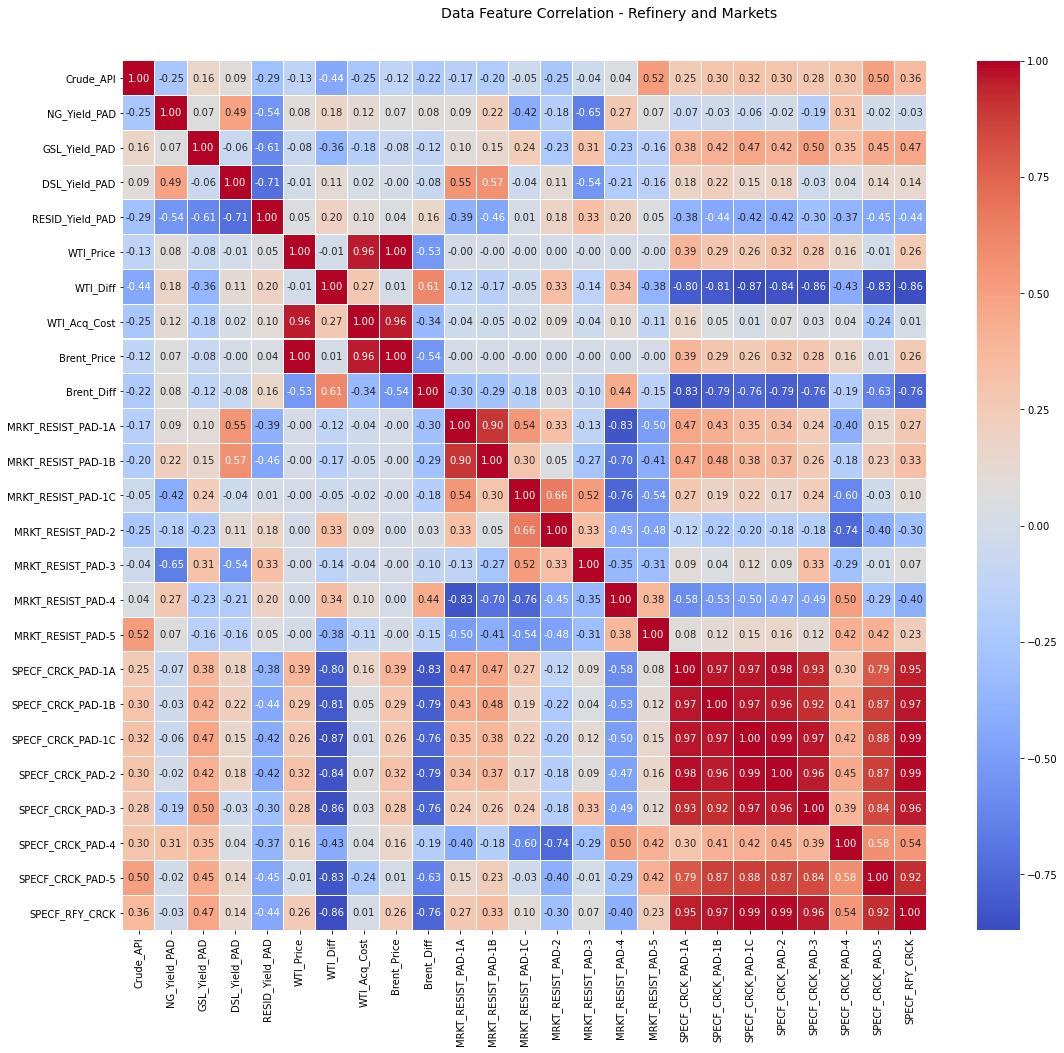

In [79]:
f, ax = plt.subplots(figsize=(18,15))

hm = sns.heatmap(round(data_df_mtrx.corr(),2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidth=.05)

f.subplots_adjust(top=0.93)
t = f.suptitle('Data Feature Correlation - Refinery and Markets', fontsize=14)

It looks like the Net Crack Spread values of specific PAD-Districts are highly correlated with the Market Resistance in the same PAD-Districts, where refineries are located. Except for refineries located in PAD-2 - they were clearly more concerned with the market resistance in PAD-1A and PAD-1B, which could indicate that their target customer base is located outside of their locale.

The aggregate Net Crack Spread value, with the location factor ignored, is correlated with the following features: Gasoline Yield (GSL_Yield_PAD), type of Crude (Crude API), and the Crude Market Indecies - both WTI and Brent equally (0.26 each).

### 3.5.2 Scatterplots

### Select features for the paired scatterplots:

In [80]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, Alabama to North Dakota
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RFY-PADD            969 non-null    object 
 1   RFY-PAD-Sub         969 non-null    object 
 2   RFY-PAD-District    969 non-null    object 
 3   RFY_ID              969 non-null    object 
 4   RFY_BPCD            969 non-null    int64  
 5   CATCRKRECYL         969 non-null    float64
 6   CATHYDRCRCK         969 non-null    float64
 7   CATHYDTRMT          969 non-null    float64
 8   CATLREFORM          969 non-null    float64
 9   CATLYTCRCK          969 non-null    float64
 10  COKING              969 non-null    float64
 11  FUELSOLDEASP        969 non-null    float64
 12  THERMCRCK           969 non-null    float64
 13  VACMDIST            969 non-null    float64
 14  Crude_API           969 non-null    float64
 15  NG_Yield_PAD        969 non-null    float64
 16

In [81]:
data_df_scatter = data_df.iloc[:,np.r_[0:4, 16:19, 19:24, 31:39]]

In [82]:
data_df_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, Alabama to North Dakota
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RFY-PADD           969 non-null    object 
 1   RFY-PAD-Sub        969 non-null    object 
 2   RFY-PAD-District   969 non-null    object 
 3   RFY_ID             969 non-null    object 
 4   GSL_Yield_PAD      969 non-null    float64
 5   DSL_Yield_PAD      969 non-null    float64
 6   RESID_Yield_PAD    969 non-null    float64
 7   WTI_Price          969 non-null    float64
 8   WTI_Diff           969 non-null    float64
 9   WTI_Acq_Cost       969 non-null    float64
 10  Brent_Price        969 non-null    float64
 11  Brent_Diff         969 non-null    float64
 12  SPECF_CRCK_PAD-1A  969 non-null    float64
 13  SPECF_CRCK_PAD-1B  969 non-null    float64
 14  SPECF_CRCK_PAD-1C  969 non-null    float64
 15  SPECF_CRCK_PAD-2   969 non-null    float64
 16  SPECF_CRCK_PAD-3

In [83]:
# create scatterplots of aggregate specific crack spread against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'SPECF_RFY_CRCK', data=data_df_scatter, alpha=0.5)
        ax.set(xlabel=col, ylabel='Specf Ref Crack')
    nsubplots = nrow * ncol    
    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [84]:
#Use a list comprehension to build a list of features from the columns of `data_df_scatter` that
#are _not_ any of 'RFY-PAD-District', 'RFY_ID', or 'SPECF_RFY_CRCK'

# ignore_array = ['RFY-PAD-District', 'RFY_ID', 'SPECF_RFY_CRCK', ]

features = [i for i in data_df_scatter.columns if i not in ['RFY-PADD', 'RFY-PAD-Sub', 'RFY-PAD-District',
                                                            'RFY_ID', 'SPECF_RFY_CRCK']]

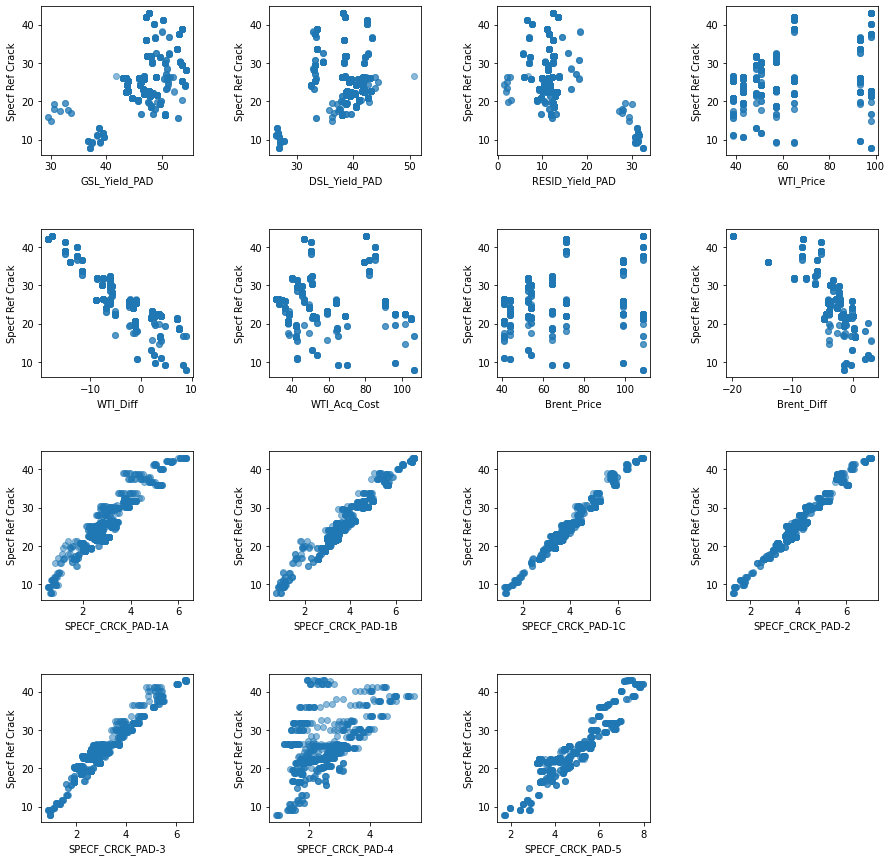

In [85]:
scatterplots(features, ncol=4, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5);

# 3.6 Summary

In [86]:
data_df.head().T

RFY_State,Alabama,Alabama,Alabama,Arkansas,Arkansas
RFY-PADD,PAD-3,PAD-3,PAD-3,PAD-3,PAD-3
RFY-PAD-Sub,PAD-3,PAD-3,PAD-3,PAD-3,PAD-3
RFY-PAD-District,PAD-3-3,PAD-3-3,PAD-3-3,PAD-3-4,PAD-3-4
RFY_ID,RFY-001,RFY-002,RFY-003,RFY-009,RFY-010
RFY_BPCD,87500,48000,4100,83000,7500
...,...,...,...,...,...
REVNUE_PAD-1C,124.993,124.993,124.993,117.208,117.208
REVNUE_PAD-2,124.985,124.985,124.985,117.177,117.177
REVNUE_PAD-3,121.808,121.808,121.808,114.516,114.516
REVNUE_PAD-4,122.432,122.432,122.432,114.979,114.979


In [87]:
# Save the data 
datapath = '../data'
save_file(data_df, 'data_step3_features.csv', datapath)

Writing file.  "../data\data_step3_features.csv"
